In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)
    def forward(self,x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()
    
f = MyNeuralNet()
opt = SGD(f.parameters(), lr=0.001)
L = nn.MSELoss()

# Train model
losses = []
for _ in range(50):
    opt.zero_grad() # flush previous epoch's gradient
    loss_value = L(f(x), y) #compute loss
    loss_value.backward() # compute gradient
    opt.step() # Perform iteration using gradient above
    losses.append(loss_value.item())

In [3]:
y

tensor([1., 5., 2., 5.])

In [4]:
f(x)

tensor([3.4200, 2.9229, 1.1532, 4.7919], grad_fn=<SqueezeBackward0>)

In [5]:
x = torch.tensor([[4, 5, 2, -1, 6, 2, 5], [1, 6, 2, -6, 5, -3, 5]])
x

tensor([[ 4,  5,  2, -1,  6,  2,  5],
        [ 1,  6,  2, -6,  5, -3,  5]])

In [6]:
R = nn.ReLU()
R(x)

tensor([[4, 5, 2, 0, 6, 2, 5],
        [1, 6, 2, 0, 5, 0, 5]])

In [7]:
x = torch.linspace(-3, 3, 100)
y = R(x)

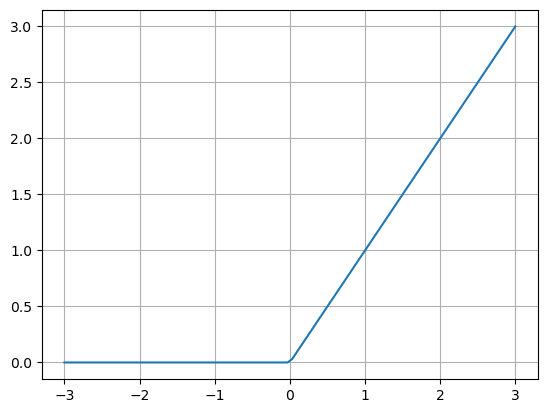

In [8]:
plt.plot(x.numpy(), y.numpy())
plt.grid()
plt.show()

In [9]:
class MyNeuralNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()
                   
                   
def train_model(x,y,f,n_epochs = 50):
    opt = SGD(f.parameters(), lr=0.001)
    L = nn.MSELoss()
                   
    #Train Model                 
    losses = []
    for _ in range(n_epochs):
        opt.zero_grad() # flush previous epoch's gradient
        loss_value = L(f(x), y) #compute loss
        loss_value.backward() # compute gradient
        opt.step() # Perform iteration using gradient above
        losses.append(loss_value.item())
        return f, losses

In [10]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f2 = MyNeuralNet2()

#Train Model
f2, losses2 = train_model(x,y,f2,n_epochs=5000)

In [11]:
y

tensor([1., 5., 2., 5.])

In [12]:
f2(x)

tensor([0.1415, 0.1567, 0.4055, 0.5942], grad_fn=<SqueezeBackward0>)

In [13]:
class MyNeuralNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 80, bias = False)
        self.Matrix2 = nn.Linear(80, 1, bias=False)
        self.R = nn.ReLU()
    def forward(self, x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [14]:
x = torch.tensor([[6,2],[5,2], [1,3], [7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f3 = MyNeuralNet3()

#train model
f3, losses3 = train_model(x, y, f3, n_epochs=5000)

In [15]:
f3(x)

tensor([1.4505, 1.2137, 1.0492, 2.0405], grad_fn=<SqueezeBackward0>)

In [16]:
y

tensor([1., 5., 2., 5.])

In [17]:
class MyNeuralNet4(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 80)
        self.Matrix2 = nn.Linear(80, 1)
        self.R = nn.ReLU()
    def forward(self, x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [18]:
x = torch.tensor([[6,2],[5,2], [1,3], [7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f4 = MyNeuralNet4()

#train model
f4, losses4 = train_model(x, y, f4, n_epochs=5000)

In [19]:
y

tensor([1., 5., 2., 5.])

In [20]:
f4(x)

tensor([1.0680, 0.9155, 0.5187, 1.3483], grad_fn=<SqueezeBackward0>)

In [21]:
class MyNeuralNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 80)
        self.Matrix2 = nn.Linear(80, 80)
        self.Matrix3 = nn.Linear(80, 1)
        self.R = nn.ReLU()
    def forward(self, x):
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()
    
x = torch.tensor([[6,2],[5,2], [1,3], [7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f5 = MyNeuralNet5()

#train model
f5, losses5 = train_model(x, y, f5, n_epochs=5000)

In [22]:
f5(x)

tensor([0.1706, 0.1401, 0.0673, 0.1658], grad_fn=<SqueezeBackward0>)

In [23]:
y

tensor([1., 5., 2., 5.])